In [ ]:
! pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import libraries

In [ ]:
import pandas as pd
import re, string
from unicodedata import normalize
import nltk, string
from nltk.corpus import stopwords
from stop_words import get_stop_words
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Funciones de preprocesamiento: limpieza de texto 

In [ ]:
def clean_text(s):
    s = s.lower() #deja todo en minúscula
    s = re.sub(r"(?:\@|https?\://)\S+","",s) #elimina urls y @cuentas
    s = re.sub('<[^\s]*>', '', s + ' ') #elimina lo que está entre <> (emoticones¡)
    s = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize('NFD', s), 0, re.I) #tildes, ¨
    s = normalize('NFC', s).replace('ñ','n') #remplaza la ñ por n
#    s = re.sub("([#][A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",s) #elimina hashtag
    s = re.sub('[^#a-z ]',' ', s) #elimina carácteres como '
    s = re.sub(' +',' ', s).strip() #elimina espacios vacios
    return s

def custom_stopwords(new_stopwords): #Genera listado de stopwords

  #stopwords from: stop_words 
  stopwords_gsw = get_stop_words('spanish') +  stopwords.words('english') #stopwords  from stop_word
  stopwords_nltk = nltk.corpus.stopwords.words('spanish') + nltk.corpus.stopwords.words('english') #stopwords from nlkt
  stopwords_letras = list(string.ascii_lowercase)

  lista_stopwords = stopwords_gsw + stopwords_nltk + stopwords_letras + new_stopwords #junta todas las stopwords
  lista_stopwords = list(set([clean_text(sw) for sw in lista_stopwords])) #limpia las stopwords y deja solo una de cada una
  #stopwords = [w.rstrip() for w in custom_stopwords] #elimina spacios en blanco a la derecha, pero esto ya se hace al limpiar el texto
  lista_stopwords.sort()
  return lista_stopwords


def remove_stopwords(text,stopwords):
  text_words = text.split()

  resultwords  = [word for word in text_words if word.lower() not in stopwords]
  result = ' '.join(resultwords)
  return result

#Open dataset and clean text

In [ ]:
from google.colab import files
files.upload()

Saving negativa_gob.csv to negativa_gob.csv


{'negativa_gob.csv': b'user_id,text\r\n3.0,"Estoy tratando de ver lo mas  lo mas neutral posible, independiente de mi postura o preferencia politica, siento que hay falta de liderazgo, han cometido mucho errores no forzados, tanto el como sus ministros, muchas frases desatinadas, la misma ministra del interior que se ha mandado varios condoros ,de los 22.000 km de territorio de la Araucania, lo que el tambien no sabe las cifras, dentro de sus posturas, de todas las promesas que prometio en campa\xc3\xb1a siento que las ha dejado de lado, se ha desviado del foco, sin liderazgo, su gobierno en general ha cometido muchos errores, por eso la nota"\r\n10.0,Sin audio\r\n12.0,"Esta mas en veremos, hay algunas cosas que en  verdad en la campa\xc3\xb1a no lo prometio como el retiro del 10 % pero si antes de eso, decian que ibamos a retirar la plata y no se hizo, dependiamos de ese dinero y no se hizo y se supone que ese dinero es nuestro"\r\n13.0,"Parece un lider muy poco serio, \xe2\x80\xa6.. 

In [ ]:
df = pd.read_csv('negativa_gob.csv')
df

,user_id,text
0,3.0,Estoy tratando de ver lo mas lo mas neutral p...
1,10.0,Sin audio
2,12.0,"Esta mas en veremos, hay algunas cosas que en ..."
3,13.0,"Parece un lider muy poco serio, ….. Cual es el..."
4,14.0,"No ha hecho nada, no ha podido ejercer como de..."
...,...,...
1030,1794.0,No sirve para nada
1031,1795.0,No cumplio nada de lo que prometio
1032,1796.0,"Hay que dar esperanza, ahí no mas, inmaduro"
1033,1797.0,No ha sido consecuente


In [ ]:
#nos aseguramos que toda la columan sea string
df['text'] = df['text'].astype(str)

In [ ]:
variable_nombre = 'text'
df[variable_nombre+'clean'] = df[variable_nombre].apply(clean_text)
texto_consolidado = " ".join(str(texto) for texto in df[variable_nombre+'clean'])

#Wordcloud

In [ ]:
####### ACA SE SUBE EL CSV DE STOPWORDS_R #####
from google.colab import files
files.upload()

Saving Stopwords_R (2).csv to Stopwords_R (2).csv


{'Stopwords_R (2).csv': b'0,x\r\n1,0\r\n2,1\r\n3,2\r\n4,3\r\n5,4\r\n6,5\r\n7,6\r\n8,7\r\n9,8\r\n10,9\r\n11,_\r\n12,a\r\n13,actualmente\r\n14,acuerdo\r\n15,adelante\r\n16,ademas\r\n17,adem\xc3\xa1s\r\n18,adrede\r\n19,afirm\xc3\xb3\r\n20,agreg\xc3\xb3\r\n21,ahi\r\n22,ahora\r\n23,ah\xc3\xad\r\n24,al\r\n25,algo\r\n26,alguna\r\n27,algunas\r\n28,alguno\r\n29,algunos\r\n30,alg\xc3\xban\r\n31,alli\r\n32,all\xc3\xad\r\n33,alrededor\r\n34,ambos\r\n35,ampleamos\r\n36,antano\r\n37,anta\xc3\xb1o\r\n38,ante\r\n39,anterior\r\n40,antes\r\n41,apenas\r\n42,aproximadamente\r\n43,aquel\r\n44,aquella\r\n45,aquellas\r\n46,aquello\r\n47,aquellos\r\n48,aqui\r\n49,aqu\xc3\xa9l\r\n50,aqu\xc3\xa9lla\r\n51,aqu\xc3\xa9llas\r\n52,aqu\xc3\xa9llos\r\n53,aqu\xc3\xad\r\n54,arriba\r\n55,arribaabajo\r\n56,asegur\xc3\xb3\r\n57,asi\r\n58,as\xc3\xad\r\n59,atras\r\n60,aun\r\n61,aunque\r\n62,ayer\r\n63,a\xc3\xb1adi\xc3\xb3\r\n64,a\xc3\xban\r\n65,b\r\n66,bajo\r\n67,bastante\r\n68,bien\r\n69,breve\r\n70,buen\r\n71,buena\r\n72,b

In [ ]:
#stopwords

stopwords_R = list(pd.read_csv('Stopwords_R (2).csv').x.values) #acá tiene que leer el csv con las stopwords de R
new_stopwords = ['deja','ano','sirve','vuela','tanta','dejan','cosa','siento','salir','llegar','cumpliendo','cumplido','esste','audio', 'inentendible', 'ido', 'ven', 'veo', 'hablar', 'responde', 'persona', 'gente', 'representa', 'gusta', 'gente', 'audio', 'podido', 'prometido', 'veo', 'persona', 'audio inentendible','visto','necesita','iba'] 
new_stopwords.extend(stopwords_R)
stopwords_list = custom_stopwords(new_stopwords)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_list,
                min_font_size = 10).generate(texto_consolidado) # 

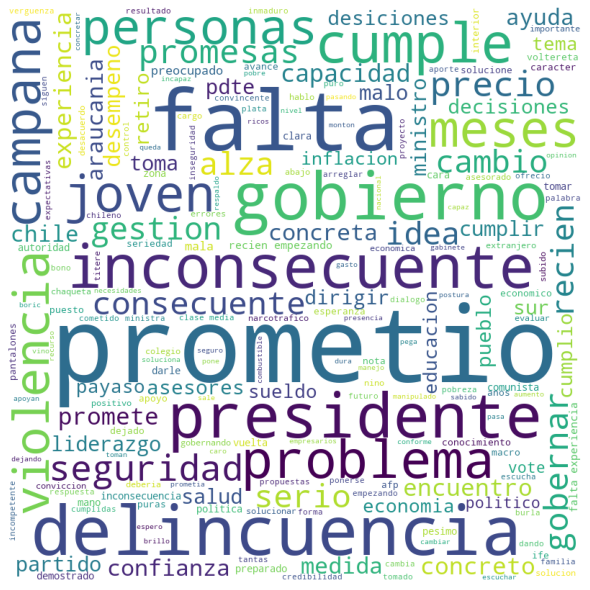

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('neg_gob_wc.png',  dpi=800)
plt.show()